<br><br><center><h1 style="font-size:40px;color:#20B2AA">Author Classification </h1></center>
![](https://images.blog.whsmith.co.uk/leadimage/top-books-2015-postlead.jpg)

In [37]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np 
import glob
import os
import cv2
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
books=[]
for book in glob.glob("F:/data/books/*"):
    books.append(str(str(book).replace("F:/data/books\\","")).replace(".txt",""))

In [5]:
len(books)

1999

In [6]:
books[:15]

['1632',
 '1876',
 '1982_Janine',
 '2010_Odyssey_Two',
 '2061_Odyssey_Three',
 '253',
 '3001_The_Final_Odyssey',
 '334',
 'Abarat',
 'Abhorsen',
 'About_a_Boy',
 'Absalom_Absalom',
 'Absolution_Gap',
 'According_to_Mary_Magdalene',
 'Addictive_Aversions']

# Get Author's name by crawling on Wikipedia

![](https://image.ibb.co/jRo3bo/Capture.png)

In [7]:
my_dict = {}

In [8]:
def get_author_name(_bookname):
    website_url = requests.get("https://en.wikipedia.org/wiki/"+_bookname).text
    soup = BeautifulSoup(website_url,'lxml')
    try:
        try:
            my_dict[_bookname] = (re.findall('title="(.*)"',str(soup.find('table',{'class':'infobox vcard'}).find_all("a")[1])))[0]
        except IndexError:
            os.remove("F:/data/books/"+str(_bookname)+".txt")
    except AttributeError:
        os.remove("F:/data/books/"+str(_bookname)+".txt")

In [ ]:
[get_author_name(book) for book in books]

In [18]:
len(my_dict)

1198

In [21]:
df = pd.DataFrame(list(my_dict.items()), columns=['Book', 'Author'])

In [29]:
df.to_csv("Authors.csv", sep='\t', encoding='utf-8',index=False)

In [2]:
data = pd.read_csv("Authors.csv", sep='\t', encoding='utf-8')

In [30]:
data.head(10)

,Book,Author
0,1982_Janine,Alasdair Gray
1,2010_Odyssey_Two,Arthur C. Clarke
2,2061_Odyssey_Three,Arthur C. Clarke
3,Abarat,Clive Barker
4,Abhorsen,Garth Nix
5,Absolution_Gap,Alastair Reynolds
6,According_to_Mary_Magdalene,Marianne Fredriksson
7,Adventures_of_Huckleberry_Finn,Mark Twain
8,Adventures_of_Wim,Luke Rhinehart
9,After_the_Funeral,Agatha Christie


In [28]:
text=[]
def read_text_file(_bookname):
    with open('F:/data/books/'+_bookname+'.txt', 'r',encoding="utf8") as myfile:
        text.append(myfile.read())

In [ ]:
[read_text_file(book) for book in data.Book]

In [33]:
data['Text']=pd.Series(text)

# Our data

In [5]:
data = pd.read_csv("F:/data/Authors_full.csv",sep="\t")

In [6]:
print("data shape {0}".format(data.shape))
data.head(10)

data shape (1198, 3)


,Book,Author,Text
0,1982_Janine,Alasdair Gray,"The novel is narrated by Jock McLeish, a supe..."
1,2010_Odyssey_Two,Arthur C. Clarke,The story is set nine years after the failure...
2,2061_Odyssey_Three,Arthur C. Clarke,"In the previous novel, 2010: Odyssey Two, Jup..."
3,Abarat,Clive Barker,"Abarat focuses on Candy Quackenbush, a teenag..."
4,Abhorsen,Garth Nix,"The main novel begins at Abhorsen's House, wh..."
5,Absolution_Gap,Alastair Reynolds,The plot of the novel takes place in four sep...
6,According_to_Mary_Magdalene,Marianne Fredriksson,The story offers a feminist perspective on th...
7,Adventures_of_Huckleberry_Finn,Mark Twain,"The story begins in fictional St. Petersburg,..."
8,Adventures_of_Wim,Luke Rhinehart,The book takes Luke's style to its logical co...
9,After_the_Funeral,Agatha Christie,After the funeral of the wealthy Richard Aber...


In [7]:
X = data.Text.tolist()
y = data.Author

In [8]:
len(X)

1198

In [9]:
len(y)

1198

In [10]:
len(y.unique())

627

In [164]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
data = [go.Bar(
            x = y.unique(),
            y = y.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = y.value_counts().values))]
layout = go.Layout(  title='Số lượng đầu sách của mỗi tác giả')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')


![](https://image.ibb.co/cHBiUJ/newplot.png)

# Getting rid of StopWords

In [13]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
X_filtered = X[:]
for idx, arr in enumerate(X):
    for i in arr.lower().split():
        if i in stopwords.words('english'):
            X_filtered[idx] = ((X_filtered[idx].lower()).replace((" "+i+" "),' ')).replace("   "," ")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhucCoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
X[0]

' The novel is narrated by Jock McLeish, a supervisor of the installation of alarm systems. Divorced, alcoholic and approaching fifty, his problems coalesce in a long night of the soul in a hotel room in Greenock. McLeish attempts to spend the night assembling an intricate pornographic fantasy. His cast of characters includes: Janine, based on a childhood memory of Jane Russell in The Outlaw; Superb (short for Superbitch); and Big Momma, an obese lesbian. All of these are submitted to sadomasochistic practices, parts of which are described at some length. However, McLeish constantly returns to reminiscences of his previous life and lovers. These prompt his attempted suicide. Chapter 11 of the novel is a typographical explosion, with the text splitting into several parallel voices on each page (including that of God). The crisis concludes with McLeish vomiting up the pills which he had hoped would kill him, and facing the truth of his actions as morning dawns.'

In [15]:
X_filtered[0]

' novel narrated jock mcleish, supervisor installation alarm systems. divorced, alcoholic approaching fifty, problems coalesce long night soul hotel room greenock. mcleish attempts spend night assembling intricate pornographic fantasy. cast characters includes: janine, based childhood memory jane russell outlaw; superb (short superbitch); big momma, obese lesbian. submitted sadomasochistic practices, parts described length. however, mcleish constantly returns reminiscences previous life lovers. prompt attempted suicide. chapter 11 novel typographical explosion, text splitting several parallel voices page (including god). crisis concludes mcleish vomiting pills hoped would kill him, facing truth actions morning dawns.'

#  Lemmatization & Stemming 

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('wordnet')
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhucCoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
X_filtered[0]

' novel narrated jock mcleish, supervisor installation alarm systems. divorced, alcoholic approaching fifty, problems coalesce long night soul hotel room greenock. mcleish attempts spend night assembling intricate pornographic fantasy. cast characters includes: janine, based childhood memory jane russell outlaw; superb (short superbitch); big momma, obese lesbian. submitted sadomasochistic practices, parts described length. however, mcleish constantly returns reminiscences previous life lovers. prompt attempted suicide. chapter 11 novel typographical explosion, text splitting several parallel voices page (including god). crisis concludes mcleish vomiting pills hoped would kill him, facing truth actions morning dawns.'

In [18]:
for idx, arr in enumerate(X_filtered):
    words = word_tokenize(arr)
    for _word in words:
        X_filtered[idx] = (X_filtered[idx]).replace(_word,lemm.lemmatize(_word))

In [19]:
X_filtered[0]

' novel narrated jock mcleish, supervisor installation alarm system. divorced, alcoholic approaching fifty, problem coalesce long night soul hotel room greenock. mcleish attempt spend night assembling intricate pornographic fantasy. cast character includes: janine, based childhood memory jane russell outlaw; superb (short superbitch); big momma, obese lesbian. submitted sadomasochistic practice, part described length. however, mcleish constantly return reminiscence previous life lover. prompt attempted suicide. chapter 11 novel typographical explosion, text splitting several parallel voice page (including god). crisis concludes mcleish vomiting pill hoped would kill him, facing truth action morning dawn.'

In [20]:
from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()
ps = PorterStemmer()

In [21]:
X_filtered[0]

' novel narrated jock mcleish, supervisor installation alarm system. divorced, alcoholic approaching fifty, problem coalesce long night soul hotel room greenock. mcleish attempt spend night assembling intricate pornographic fantasy. cast character includes: janine, based childhood memory jane russell outlaw; superb (short superbitch); big momma, obese lesbian. submitted sadomasochistic practice, part described length. however, mcleish constantly return reminiscence previous life lover. prompt attempted suicide. chapter 11 novel typographical explosion, text splitting several parallel voice page (including god). crisis concludes mcleish vomiting pill hoped would kill him, facing truth action morning dawn.'

In [22]:
for idx, arr in enumerate(X_filtered):
    words = word_tokenize(arr)
    for _word in words:
        X_filtered[idx] = (X_filtered[idx]).replace(_word,ps.stem(_word))

In [23]:
X_filtered[0]

' novel narrat jock mcleish, supervisor instal alarm system. divorc, alcohol approach fifti, problem coalesc long night soul hotel room greenock. mcleish attempt spend night assembl intric pornograph fantasi. cast charact includ: janin, base childhood memori jane russel outlaw; superb (short superbitch); big momma, obes lesbian. submit sadomasochist practic, part describ length. howev, mcleish constantli return reminisc previou life lover. prompt attempt suicid. chapter 11 novel typograph explos, text split sever parallel voic page (includ god). crisi conclud mcleish vomit pill hope would kill him, face truth action morn dawn.'

# Words per doc

In [24]:
length=0
for idx, arr in enumerate(X_filtered):
    length+=len(arr)
length/len(X_filtered)

2534.9198664440733

# Using Word2vec (CountVectorizer - Sklearn)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [133]:
X_CV = vectorizer.fit_transform(X_filtered)

In [134]:
X_CV.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# OnehotEncoder

In [135]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
enc = OneHotEncoder(sparse=True)
y_le= (le.fit_transform(y)).reshape(-1,1)
y_enc = enc.fit_transform(y_le).toarray()

In [136]:
y_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
y_le

array([[ 12],
       [ 42],
       [ 42],
       ...,
       [432],
       [120],
       [383]], dtype=int64)

# Train Test Split

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_CV, y_le, test_size=0.2, random_state=12)

In [151]:
print("training shape: {}{}".format(X_train.shape,y_train.shape))
print("testing shape : {}{}".format(X_test.shape,y_test.shape))

training shape: (958, 28176)(958, 1)
testing shape : (240, 28176)(240, 1)


# Using classifiers and then comparing

In [154]:
pd.options.mode.chained_assignment = None
#THƯ VIỆN ĐỂ VISUALIZE DATA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#THƯ VIỆN MACHINE LEARNING
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,accuracy_score, log_loss,classification_report
from sklearn import linear_model,ensemble
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.datasets.samples_generator import make_blobs

#MỘT SỐ THƯ VIỆN BỔ TRỢ KHÁC 
import itertools
import math
import time
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.filterwarnings("ignore")

Text(0.5,1,'Elbow Curve')

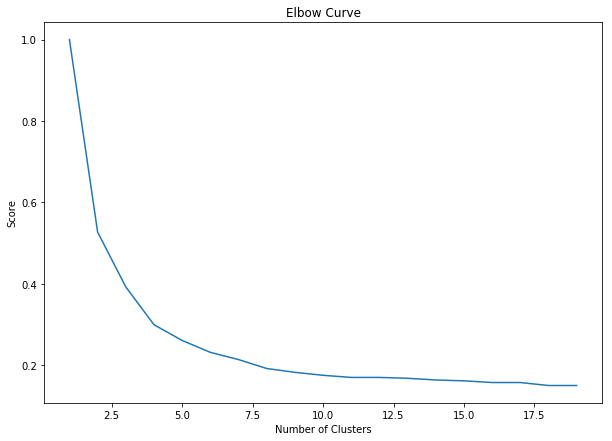

In [61]:
Nc = range(1, 20)
kmeans = [KNeighborsClassifier(i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train, y_train).score(X_train,y_train) for i in range(len(kmeans))] 
score #Opposite of the value of X on the K-means objective.
plt.figure(figsize=(10,7))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

In [62]:
classifiers = [
    KNeighborsClassifier(2),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

elapsed_time_each_algorithm = []
name_of_each_algorithm = []
for clf in classifiers:
    t = time.process_time()
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test.toarray())
    acc = accuracy_score(y_test, train_predictions)
    
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
    elapsed_time = time.process_time() - t
    elapsed_time_each_algorithm.append(elapsed_time)
    name_of_each_algorithm.append(str(name))
    print("Thời gian chạy của thuật toán {0} là {1} giây \n".format(str(name),round(elapsed_time, 2)))
# Storing the results in a DataFrame to be visualized
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

Thời gian chạy của thuật toán KNeighborsClassifier là 0.33 giây 

Thời gian chạy của thuật toán SVC là 38.7 giây 

Thời gian chạy của thuật toán DecisionTreeClassifier là 11.34 giây 

Thời gian chạy của thuật toán RandomForestClassifier là 1.17 giây 

Thời gian chạy của thuật toán AdaBoostClassifier là 14.97 giây 

Thời gian chạy của thuật toán LogisticRegression là 171.56 giây 



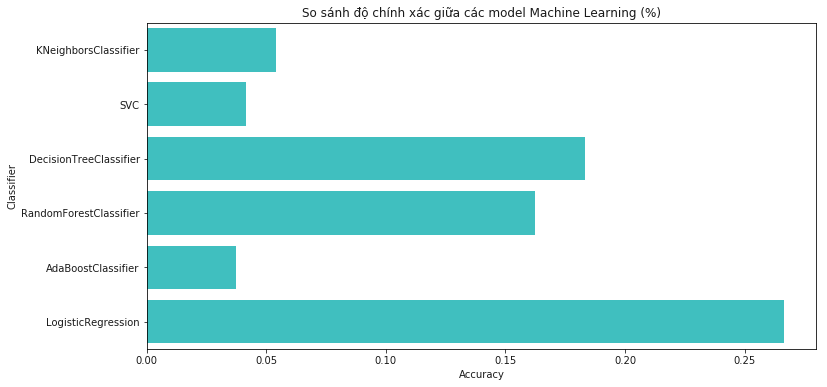

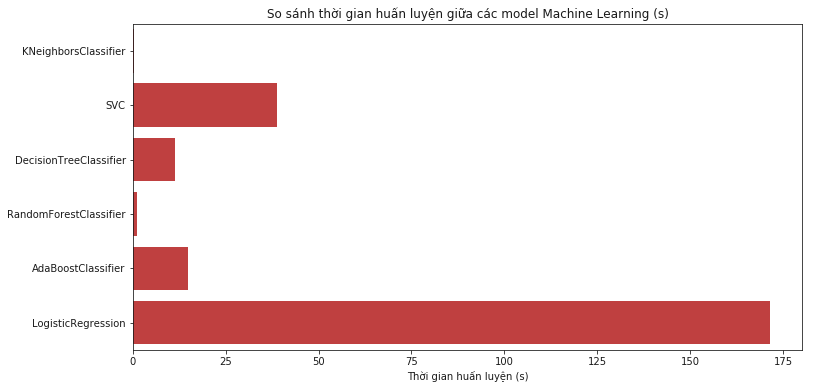

In [63]:
plt.figure(figsize=(12,6))
plt.xlabel('Độ chính xác (%)')
plt.title('So sánh độ chính xác giữa các model Machine Learning (%)')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log,color='cyan' ,saturation=.5)

plt.figure(figsize=(12,6))
plt.xlabel('Thời gian huấn luyện (s)')
plt.title('So sánh thời gian huấn luyện giữa các model Machine Learning (s)')
sns.set_color_codes("muted")
sns.barplot(x=elapsed_time_each_algorithm, y=name_of_each_algorithm,color='red',saturation=.5)

plt.show()

In [64]:
log.Accuracy = log.Accuracy*100
log

,Classifier,Accuracy
0,KNeighborsClassifier,5.416667
0,SVC,4.166667
0,DecisionTreeClassifier,18.333333
0,RandomForestClassifier,16.250000
0,AdaBoostClassifier,3.750000
0,LogisticRegression,26.666667


# Model Tuning

In [102]:
logR_param = {'C': [0.01,0.1, 0.5, 1, 3, 5]} 
logR_model1 = LogisticRegression(class_weight ='balanced',random_state=13)
logR_model = GridSearchCV(logR_model1, logR_param)
logR_model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=13,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
print('Logistic Regression:')
print('Độ chính xác (Accuracy): {}'.format(logR_model.best_score_))
print('Tham số tốt nhất: {}'.format(logR_model.best_params_))

Logistic Regression:
Độ chính xác (Accuracy): 0.2359081419624217
Tham số tốt nhất: {'C': 0.1}


In [66]:
logR_model = LogisticRegression(C=0.1,class_weight ='balanced',random_state=13)
logR_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=13,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
target_names = []
[target_names.append(i) for i in y.unique()]
target_names[5]

'Marianne Fredriksson'

In [36]:
len(target_names)

627

In [109]:
y_pred = logR_model.predict(X_test)
classification_report(y_test, y_pred,target_names=target_names)

"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        precision    recall  f1-score   support\n\n                                                                                                                                                                                                                                                                                                                                                                                    

# Setting Up Our Neural Network
* 1. Define your model. Create a Sequential model and add configured layers.
* 2. Compile your model. Specify loss function and optimizers and call the compile() function on the model.
* 3. Fit your model. Train the model on a sample of data by calling the fit() function on the model.
* 4. Make predictions. Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

In [155]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y.tolist(), test_size=0.2, random_state=12)

In [157]:
print("training shape: {}  {}".format(len(X_train),len(y_train)))
print("testing shape : {}  {}".format(len(X_test),len(y_test)))

training shape: 958  958
testing shape : 240  240


# Tokenize and Prepare Vocabulary


In [158]:
len(list(y.unique()))

627

In [160]:
# 20 news groups
num_labels = 627
vocab_size = 15000
batch_size = 100

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [161]:
X_train

array([[0.        , 0.        , 1.00174214, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.94826393, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.9283582 , 1.00174214, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.9283582 , 2.7966231 , ..., 0.        , 0.        ,
        0.        ]])

In [162]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [163]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(537))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 537)               275481    
__________